In [163]:

# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

In [171]:
portfolio = {}
# Get portfolio information. Using While True to run a loop
while True:
    stock = input('Enter a stock symbol (or ‘done’ to finish): ').upper()
    if stock == "DONE":
        break
    quantity = float(input(f'Enter the quantity of {stock}: '))
    portfolio[stock] = quantity
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())
historical_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period='5y')
    historical_data[stock_symbol] = stock_data["Close"]
#Change dataframe to pandas
historical_df = pd.DataFrame(historical_data)
#Calculate portfolio daily returns and drop na
portfolio_returns = historical_df.pct_change().dropna()
    

Enter a stock symbol (or ‘done’ to finish):  aapl
Enter the quantity of AAPL:  20
Enter a stock symbol (or ‘done’ to finish):  btc-usd
Enter the quantity of BTC-USD:  0.1
Enter a stock symbol (or ‘done’ to finish):  adp
Enter the quantity of ADP:  20
Enter a stock symbol (or ‘done’ to finish):  cost
Enter the quantity of COST:  5
Enter a stock symbol (or ‘done’ to finish):  amzn
Enter the quantity of AMZN:  15
Enter a stock symbol (or ‘done’ to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [172]:
#Downloading S&P 500 
sp500_data = yf.download('^GSPC',period="5y")                        
sp500_closing_prices = sp500_data['Close']
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']
sp500_returns = sp500_closing_prices.pct_change().dropna()
sp500_returns


[*********************100%%**********************]  1 of 1 completed


,SP500
Date,
2018-12-20,-0.015772
2018-12-21,-0.020588
2018-12-24,-0.027112
2018-12-26,0.049594
2018-12-27,0.008563
...,...
2023-12-12,0.004599
2023-12-13,0.013651
2023-12-14,0.002647


In [175]:
#Cleaning and reorganizing data
historical_df = historical_df.reset_index().rename(columns={'index': 'Date'})
historical_df = pd.DataFrame(historical_data).dropna()
historical_df

,AAPL,BTC-USD,ADP,COST,AMZN
Date,,,,,
2018-12-19,40.222500,3745.950684,130.330002,201.410004,74.753998
2018-12-20,39.207500,4134.441406,130.289993,197.130005,73.041496
2018-12-21,37.682499,3896.543701,125.370003,194.520004,68.872498
2018-12-24,36.707500,4078.599121,121.949997,189.990005,67.197998
2018-12-26,39.292500,3857.297607,127.699997,198.630005,73.544998
...,...,...,...,...,...
2023-12-11,193.179993,41243.832031,233.289993,623.859985,145.889999
2023-12-12,194.710007,41450.222656,236.679993,629.500000,147.479996
2023-12-13,197.960007,42890.742188,239.220001,642.000000,148.839996


<Axes: xlabel='Date'>

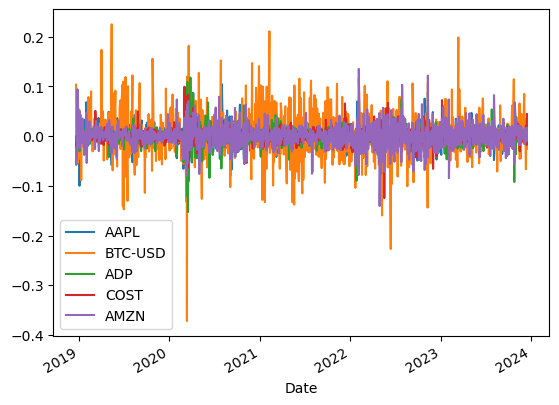

In [176]:
# Calculate daily returns of all portfolios

portfolio_returns = historical_df.pct_change().dropna()
portfolio_returns.plot()

<Axes: title={'center': 'Cumulative Returns of Portfolio'}, xlabel='Date'>

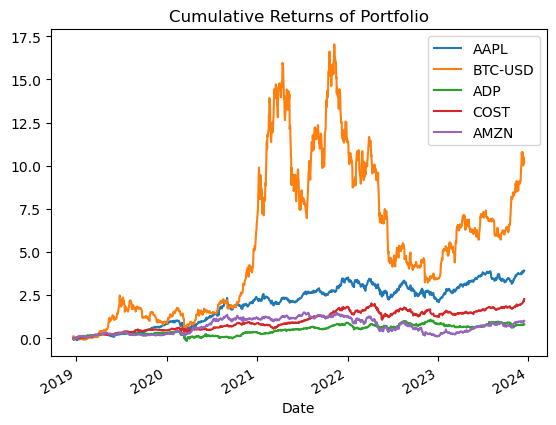

In [178]:
# Calculate cumulative returns of all portfolios


cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of Portfolio")

<Axes: title={'center': 'Portfolio Cumulative Returns vs Market (Sp 500)'}, xlabel='Date', ylabel='Return'>

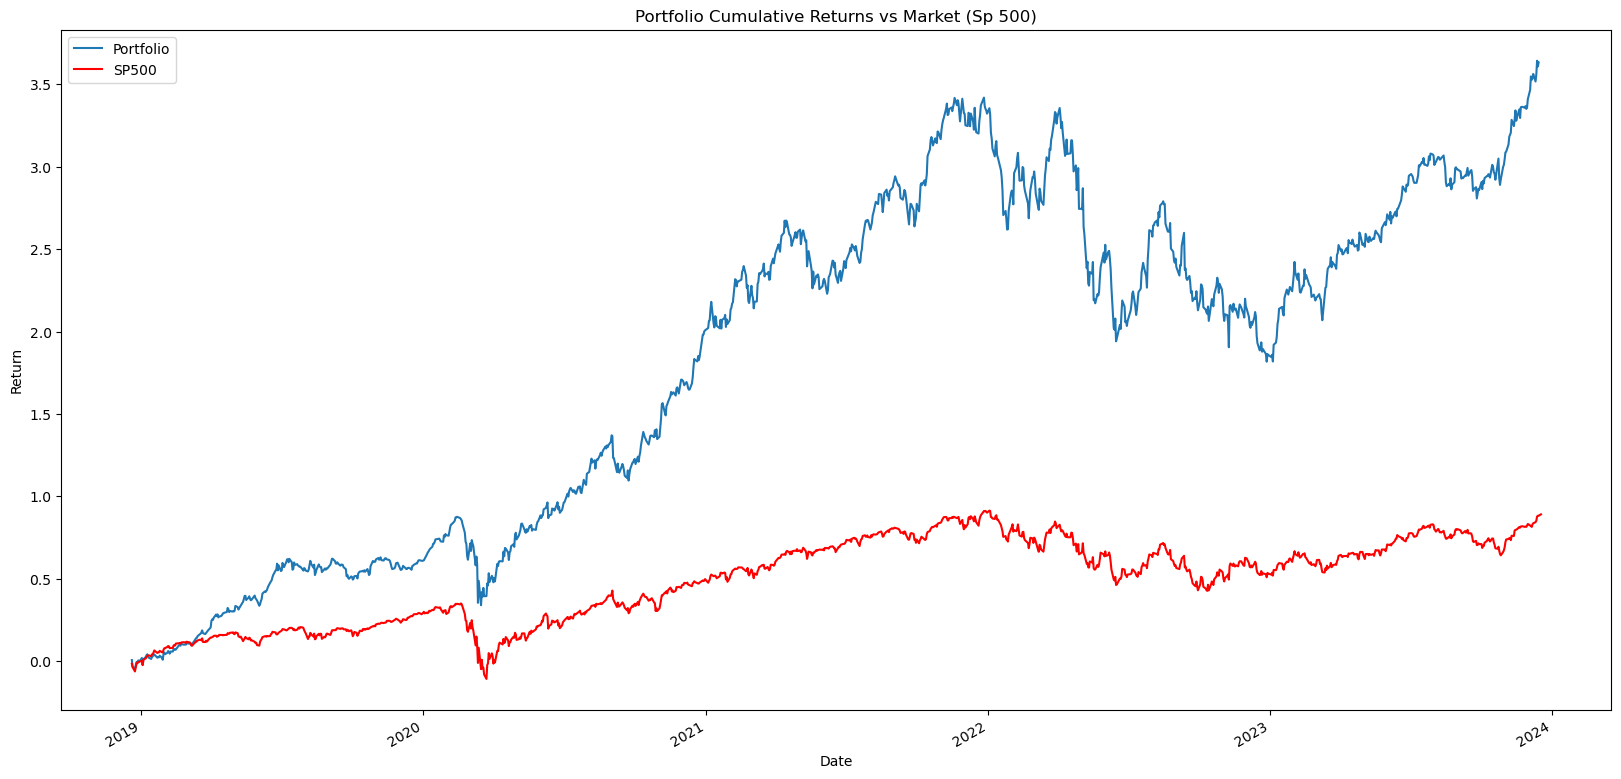

In [179]:
combined_return = portfolio_returns.mean(axis=1)
cumulative_portfolio_returns = (1 + combined_return).cumprod() - 1
ax = cumulative_portfolio_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)



cumulative_spy500_returns = (1 + sp500_returns).cumprod() - 1
cumulative_spy500_returns.plot(ax=ax, label='SP500', legend=True, c = "red")




In [192]:



def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)

# Display the current portfolio value
print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")








[*********************100%%**********************]  5 of 5 completed

Current Portfolio Value: $4281.43


[*********************100%%**********************]  5 of 5 completed


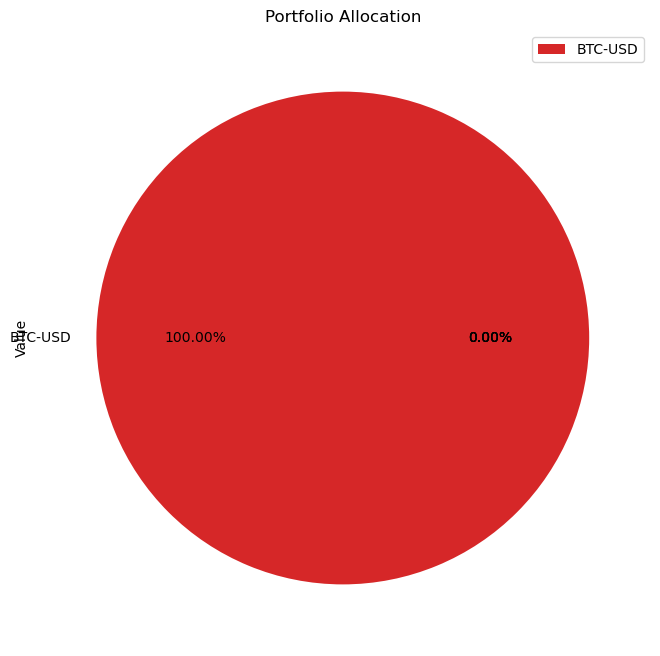

In [196]:
data = yf.download(portfolio_tickers, period='1d')["Close"]
current_prices = data.iloc[-1]
stock_shares = pd.Series(stock_shares, index=portfolio_tickers)
each_stock_value = pd.DataFrame((current_prices * stock_shares).round(2))
percentage_of_portfolio = ((each_stock_value / current_portfolio_value) * 100).round(2)
portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ["Value", "Percentage"]
portfolio_summary.plot.pie(y="Value",
                           autopct="%1.2f%%",
                           title='Portfolio Allocation',
                           figsize=(8, 8))
plt.legend(loc="upper right")